In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from LatticeData import *

# Create analyzer - instantiate class

In [2]:
analyzer = LatticeData()

## Basic statistics

In [3]:
df = analyzer.get_data()

In [4]:
df.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,nMC,...,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im,dt
0,0,100.0,-3.507803,-155.512769,-155.512769,-0.824800,6.964259,3.693286,0.480,10000.0,...,41,41,77,0.036694,0.890296,2.710455,0.223807,0.046216,-1.121317,NaN
1,1,100.0,-1.183322,-234.980899,-234.980899,-1.587746,6.964259,3.693286,0.425,10000.0,...,41,41,77,0.050911,1.235238,2.710455,0.223807,0.033310,-0.808187,NaN
2,2,100.0,-5.518374,-284.688510,-284.688510,-5.380676,6.964259,3.693286,0.380,10000.0,...,41,41,77,0.093722,2.273938,2.710455,0.223807,0.018095,-0.439020,NaN
3,3,100.0,0.188157,-320.001736,-320.001736,-9.715618,6.964259,3.693286,0.355,10000.0,...,41,41,77,0.125939,3.055593,2.710455,0.223807,0.013466,-0.326714,NaN
4,4,100.0,-2.155681,-345.995462,-345.995462,-12.525632,6.964259,3.693286,0.316,10000.0,...,41,41,77,0.142996,3.469445,2.710455,0.223807,0.011860,-0.287742,NaN


In [5]:
df["itheta"].unique()

array([0.      , 1.570796, 3.141593, 2.356194, 0.392699, 0.785398])

In [6]:
df_stats = analyzer.do_stats(therm = 0.2)

In [7]:
df_stats.head()

|phi|_mean  Q_L_mean    A_L_mean  \
length itheta   beta nMC     ntherm                                     
10.0   0.000000 1.6  10000.0 0.0          100.0  0.000039 -535.818511   
       0.392699 1.6  10000.0 0.0          100.0  0.000000 -536.112038   
       0.785398 1.6  10000.0 0.0          100.0  0.000000 -536.059309   
       1.570796 1.6  10000.0 0.0          100.0  0.000000 -535.733114   
       2.356194 1.6  10000.0 0.0          100.0  0.000000 -536.263416   

                                       S_L_mean  Xi_L_mean  F_LRe_mean  \
length itheta   beta nMC     ntherm                                      
10.0   0.000000 1.6  10000.0 0.0    -535.818511  67.320500    6.964259   
       0.392699 1.6  10000.0 0.0    -536.112038  68.669267    7.581287   
       0.785398 1.6  10000.0 0.0    -536.059309  69.855486    5.722368   
       1.570796 1.6  10000.0 0.0    -535.733114  68.771278    3.009414   
       2.356194 1.6  10000.0 0.0    -536.263416  68.720890    2.595148   

                                     F_LIm_mean  acc_mean  Q_L_ta  A_L_ta  \
length itheta   beta nMC     ntherm                                         
10.0   0.000000 1.6  10000.0 0.0       3.693286  0.086961    17.0    41.0   
       0.392699 1.6  10000.0 0.0       2.844019  0.086869    69.0    37.0   
       0.785398 1.6  10000.0 0.0       1.394511  0.086497    21.0    33.0   
       1.570796 1.6  10000.0 0.0       1.373289  0.086414   158.0    95.0   
       2.356194 1.6  10000.0 0.0       1.942084  0.087583   413.0   277.0   

                                     ...   acc_std  corr_length_Re_std  \
length itheta   beta nMC     ntherm  ...                                 
10.0   0.000000 1.6  10000.0 0.0     ...  0.000741            1.024573   
       0.392699 1.6  10000.0 0.0     ...  0.000649            1.054887   
       0.785398 1.6  10000.0 0.0     ...  0.000599            1.246056   
       1.570796 1.6  10000.0 0.0     ...  0.000729            1.034008   
       2.356194 1.6  10000.0 0.0     ...  0.000851            1.047562   

                                     corr_length_Im_std  F_Re_py_std  \
length itheta   beta nMC     ntherm                                    
10.0   0.000000 1.6  10000.0 0.0               0.042229          0.0   
       0.392699 1.6  10000.0 0.0               0.172336          0.0   
       0.785398 1.6  10000.0 0.0               0.399596          0.0   
       1.570796 1.6  10000.0 0.0               0.088823          0.0   
       2.356194 1.6  10000.0 0.0               0.321620          0.0   

                                     F_Im_py_std  mass_gap_Re_std  \
length itheta   beta nMC     ntherm                                 
10.0   0.000000 1.6  10000.0 0.0             0.0         0.023944   
       0.392699 1.6  10000.0 0.0             0.0         0.019047   
       0.785398 1.6  10000.0 0.0             0.0         0.022805   
       1.570796 1.6  10000.0 0.0             0.0         0.017517   
       2.356194 1.6  10000.0 0.0             0.0         0.029644   

                                     mass_gap_Im_std  time (sec)  time (min)  \
length itheta   beta nMC     ntherm                                            
10.0   0.000000 1.6  10000.0 0.0            0.000987         NaN         NaN   
       0.392699 1.6  10000.0 0.0            0.013846       886.0   14.766667   
       0.785398 1.6  10000.0 0.0            0.041967         NaN         NaN   
       1.570796 1.6  10000.0 0.0            0.001505         NaN         NaN   
       2.356194 1.6  10000.0 0.0            0.015170         NaN         NaN   

                                     time (hr)  
length itheta   beta nMC     ntherm             
10.0   0.000000 1.6  10000.0 0.0           NaN  
       0.392699 1.6  10000.0 0.0      0.246111  
       0.785398 1.6  10000.0 0.0           NaN  
       1.570796 1.6  10000.0 0.0           NaN  
       2.356194 1.6  10000.0 0.0           NaN  

[5 rows x 35 columns]

# Observable plots

In [8]:
beta = 1.6
nMC = 10000
plot_params = {"beta": beta, "nMC": nMC}

In [9]:
df_stats = analyzer.do_stats(therm = 0.4, **plot_params)

In [10]:
df_stats.columns

Index(['|phi|_mean', 'Q_L_mean', 'A_L_mean', 'S_L_mean', 'Xi_L_mean',
       'F_LRe_mean', 'F_LIm_mean', 'acc_mean', 'Q_L_ta', 'A_L_ta', 'S_L_ta',
       'Xi_L_ta', 'corr_length_Re_mean', 'corr_length_Im_mean', 'F_Re_py_mean',
       'F_Im_py_mean', 'mass_gap_Re_mean', 'mass_gap_Im_mean', '|phi|_std',
       'Q_L_std', 'A_L_std', 'S_L_std', 'Xi_L_std', 'F_LRe_std', 'F_LIm_std',
       'acc_std', 'corr_length_Re_std', 'corr_length_Im_std', 'F_Re_py_std',
       'F_Im_py_std', 'mass_gap_Re_std', 'mass_gap_Im_std', 'time (sec)',
       'time (min)', 'time (hr)'],
      dtype='object')

### Q_L

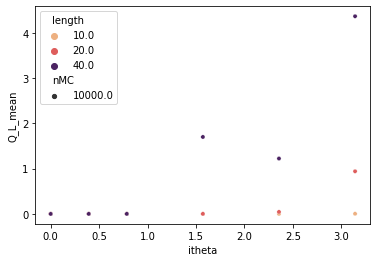

In [11]:
sns.scatterplot(data = df_stats, x = "itheta", y = "Q_L_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)
plt.show()

### S_L

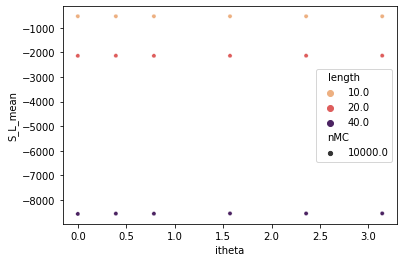

In [12]:
sns.scatterplot(data = df_stats, x = "itheta", y = "S_L_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)
plt.show()

### Xi_L

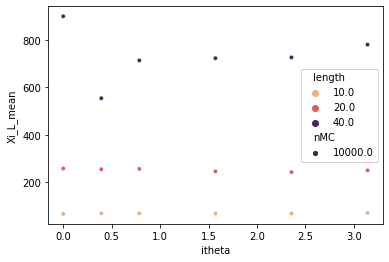

In [13]:
sns.scatterplot(data = df_stats, x = "itheta", y = "Xi_L_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)
plt.show()

### F_L Re

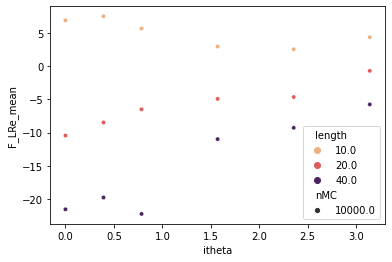

In [14]:
sns.scatterplot(data = df_stats, x = "itheta", y = "F_LRe_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)

plt.show()

In [15]:
F_L_Re_df = df_stats.filter(["F_LRe_mean","F_Re_py_mean"])
F_L_Re_df.rename(columns = {"F_LRe_mean":"C++","F_Re_py_mean":"Python"},inplace = True)
F_L_Re_df.columns.name = 'Source'
F_L_Im_df = df_stats.filter(["F_LIm_mean","F_Im_py_mean"])
F_L_Im_df.rename(columns = {"F_LIm_mean":"C++","F_Im_py_mean":"Python"},inplace = True)
F_L_Im_df.columns.name = 'Source'
F_L_Re_df = F_L_Re_df.stack()
F_L_Im_df = F_L_Im_df.stack()
F_L_Re_df.name = "F_L"
F_L_Re_df = F_L_Re_df.to_frame()
F_L_Im_df.name = "F_L"
F_L_Im_df = F_L_Im_df.to_frame()
F_L_Im_df.head()

F_L
length itheta   beta nMC     ntherm Source          
10.0   0.000000 1.6  10000.0 0.0    C++     3.693286
                                    Python  0.223807
       0.392699 1.6  10000.0 0.0    C++     2.844019
                                    Python -0.356265
       0.785398 1.6  10000.0 0.0    C++     1.394511

In [16]:
F_L_df = F_L_Re_df.join(F_L_Im_df, lsuffix = "_Re", rsuffix = "_Im")

In [21]:
F_L_df.head()

F_L_Re    F_L_Im
length itheta   beta nMC     ntherm Source                    
10.0   0.000000 1.6  10000.0 0.0    C++     6.964259  3.693286
                                    Python  2.710455  0.223807
       0.392699 1.6  10000.0 0.0    C++     7.581287  2.844019
                                    Python  2.302333 -0.356265
       0.785398 1.6  10000.0 0.0    C++     5.722368  1.394511

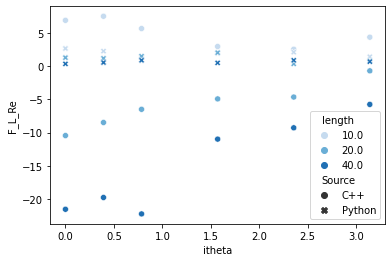

In [23]:
sns.scatterplot(data = F_L_df, x = "itheta", y = "F_L_Re", hue = "length", 
                style = "Source", palette = sns.color_palette("Blues", 3))
plt.show()

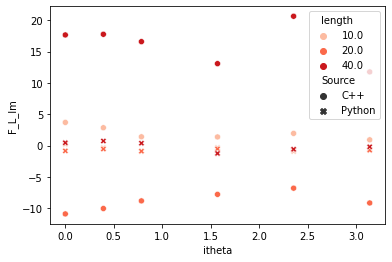

In [24]:
sns.scatterplot(data = F_L_df, x = "itheta", y = "F_L_Im", hue = "length", 
                style = "Source", palette = sns.color_palette("Reds", 3))
plt.show()

## Correlation Length

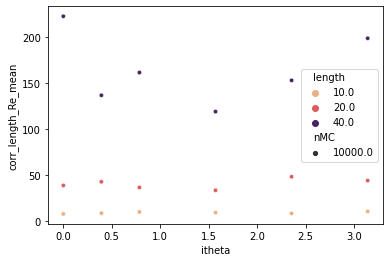

In [19]:
sns.scatterplot(data = df_stats, x = "itheta", y = "corr_length_Re_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)

plt.show()

### Mass Gap

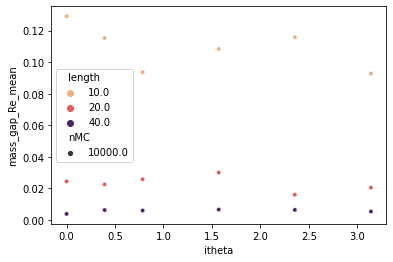

In [20]:
sns.scatterplot(data = df_stats, x = "itheta", y = "mass_gap_Re_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)

plt.show()